In [1]:
# 라이브러리 추가하기
import geopandas as gpd
from fiona.crs import from_epsg
%matplotlib inline

#### 서울시 행정동 goeJson 불러오기
* GeoDataframe 생성하기
* 데이터 확인하기
* plot()으로 지도 확인하기

In [4]:
# _01 서울시 법정동 geojson 파일
_seoul_h_dong = './output/seoul_h_dong.geojson'

In [5]:
# _02 GeoDataFrame
seoul_h_dong_gdf = gpd.read_file(_seoul_h_dong)
print(seoul_h_dong_gdf.crs, '\n')
seoul_h_dong_gdf.info()
seoul_h_dong_gdf.head(10)

epsg:4326 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SGG_NM      424 non-null    object  
 1   DONG_NM     424 non-null    object  
 2   SGG_CODE    424 non-null    object  
 3   SEDAE       424 non-null    int64   
 4   SEDAE_INGU  424 non-null    float64 
 5   TOTAL_POP   424 non-null    int64   
 6   MALE_POP    424 non-null    int64   
 7   FEMALE_POP  424 non-null    int64   
 8   65_OVER     424 non-null    int64   
 9   geometry    424 non-null    geometry
dtypes: float64(1), geometry(1), int64(5), object(3)
memory usage: 33.2+ KB


,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geometry
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((126.97689 37.57565, 126.97703 37.569..."
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((126.98269 37.59507, 126.98337 37.594..."
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((126.97585 37.59656, 126.97359 37.593..."
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((126.97507 37.63139, 126.97649 37.630..."
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((126.96067 37.58080, 126.96281 37.579..."
5,종로구,교남동,11110,4379,2.34,10363,4850,5513,1406,"POLYGON ((126.96905 37.56819, 126.96801 37.567..."
6,종로구,가회동,11110,2085,2.17,4657,2194,2463,900,"POLYGON ((126.98914 37.59131, 126.98831 37.587..."
7,종로구,종로1.2.3.4가동,11110,5378,1.41,8592,5045,3547,1865,"POLYGON ((126.99650 37.58102, 126.99641 37.580..."
8,종로구,종로5·6가동,11110,3174,1.69,5690,3096,2594,1089,"POLYGON ((127.01016 37.57157, 127.00959 37.569..."
9,종로구,이화동,11110,4462,1.85,8752,4075,4677,1302,"POLYGON ((127.00733 37.58320, 127.00884 37.580..."


<AxesSubplot:>

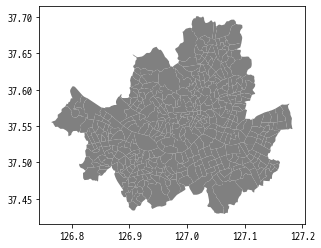

In [6]:
# _03 법정동 지도 보기
seoul_h_dong_gdf.plot(color='gray')

####  Dissolve를 이용해 행정동 -> 시군구 지도 데이터 만들기

![dissolve.png](attachment:dissolve.png)